In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

In [2]:
X, y = mnist["data"], mnist["target"]

In [3]:
import numpy as np

y = y.astype(np.uint)

In [4]:
X_train, y_train, X_val, y_val, X_test, y_test = X[:50000], y[:50000], X[50000:60000], y[50000:60000], X[60000:], y[60000:]

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, verbose=0)

In [14]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, rf_clf.predict(X_val))

0.8402

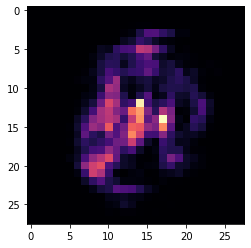

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt

importance_image = rf_clf.feature_importances_.reshape(28, 28)

plt.imshow(importance_image, cmap="magma")

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200, algorithm="SAMME.R", learning_rate=0.5)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [22]:
accuracy_score(y_val, ada_clf.predict(X_val))

0.7905

In [24]:
accuracies = [accuracy_score(y_val, y_pred) for y_pred in ada_clf.staged_predict(X_val)]
best_num_estimators = np.argmax(accuracies) + 1

In [25]:
best_num_estimators

128

In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

bst_ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=128, algorithm="SAMME.R", learning_rate=0.5)

bst_ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=128)

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, verbose=2)
bag_clf.fit(X_train[:30000], y_train[:30000])

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:  1.4min remaining:  2.3min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  1.5min finished


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  max_samples=100, n_estimators=500, n_jobs=-1, verbose=2)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, bag_clf.predict(X_val))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   23.0s remaining:   38.4s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   24.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   24.1s finished


0.8501

In [18]:
rf_val_pred = rf_clf.predict_proba(X_val)

In [19]:
ada_val_pred = bst_ada_clf.predict_proba(X_val)

In [20]:
bag_val_pred = bag_clf.predict_proba(X_val)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   17.0s remaining:   28.5s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   17.8s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   17.8s finished


In [21]:
bag_val_pred[:10]

array([[0.03359037, 0.23262553, 0.12384336, 0.32318444, 0.02468848,
        0.07811208, 0.0502666 , 0.02153756, 0.08327448, 0.02887711],
       [0.02479375, 0.12041275, 0.09024737, 0.11517196, 0.13185888,
        0.12126433, 0.05936351, 0.05221932, 0.22540058, 0.05926754],
       [0.11772759, 0.01471036, 0.08189575, 0.04618818, 0.11290297,
        0.07154366, 0.39040112, 0.09063155, 0.03285987, 0.04113894],
       [0.01574433, 0.01742904, 0.04458775, 0.03311528, 0.22380261,
        0.03937813, 0.04495606, 0.20434056, 0.03482752, 0.34181872],
       [0.04535266, 0.05817648, 0.12968627, 0.03111761, 0.14092003,
        0.04508063, 0.4669553 , 0.01572069, 0.03608469, 0.03090563],
       [0.03856484, 0.05559455, 0.10756169, 0.04562288, 0.12450535,
        0.08922234, 0.18320678, 0.11812986, 0.06920917, 0.16838254],
       [0.07246487, 0.17063847, 0.03602688, 0.0794463 , 0.15247284,
        0.14690019, 0.06060237, 0.08018238, 0.14291032, 0.05835538],
       [0.14675798, 0.03816085, 0.0658126

In [23]:
rf_val_pred = rf_clf.predict_proba(X_val)
ada_val_pred = bst_ada_clf.predict_proba(X_val)
bag_val_pred = bag_clf.predict_proba(X_val)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   15.8s remaining:   26.4s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   16.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   16.0s finished


In [26]:
X_pred_train = np.vstack((rf_val_pred, ada_val_pred, bag_val_pred))

In [27]:
X_pred_train.shape

(30000, 10)

In [28]:
X_pred_train[:10]

array([[0.0302357 , 0.16969036, 0.16241296, 0.26006086, 0.02694239,
        0.09951134, 0.06689143, 0.02822163, 0.12507869, 0.03095463],
       [0.02966983, 0.06108114, 0.09081494, 0.13085717, 0.10626114,
        0.12532354, 0.07431475, 0.06126948, 0.23689077, 0.08351724],
       [0.18845676, 0.00833718, 0.08994513, 0.07863378, 0.06640354,
        0.11458929, 0.30997464, 0.06717693, 0.03632979, 0.04015297],
       [0.02187477, 0.00817717, 0.04146041, 0.04045598, 0.2271987 ,
        0.0622252 , 0.04923785, 0.15020523, 0.04659927, 0.35256542],
       [0.04019485, 0.03915561, 0.14268012, 0.04729658, 0.11801913,
        0.05913637, 0.39127834, 0.02788711, 0.07669577, 0.05765612],
       [0.0508519 , 0.01636531, 0.07374173, 0.04978147, 0.1713574 ,
        0.08410624, 0.19057691, 0.09810708, 0.077967  , 0.18714495],
       [0.0861931 , 0.08722758, 0.04467014, 0.08820121, 0.1718472 ,
        0.14545104, 0.08477913, 0.07236197, 0.11221823, 0.1070504 ],
       [0.1568648 , 0.0138406 , 0.0923186

In [30]:
rf_val_pred.shape

(10000, 10)

In [31]:
X_pred_train = np.concatenate((rf_val_pred, ada_val_pred, bag_val_pred),axis=1)

In [32]:
X_pred_train.shape

(10000, 30)

In [36]:
y_pred_train = y_val

In [34]:
rf_bld_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, verbose=0)

In [37]:
rf_bld_clf.fit(X_pred_train, y_pred_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [40]:
def blendPredict(est1, est2, est3, blnd, X):
    pred_1 = est1.predict_proba(X)
    pred_2 = est2.predict_proba(X)
    pred_3 = est3.predict_proba(X)
    X_pred = np.concatenate((pred_1, pred_2, pred_3),axis=1)
    return blnd.predict(X_pred)

In [42]:
accuracy_score(y_test, blendPredict(rf_clf, bst_ada_clf, bag_clf, rf_bld_clf, X_test))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   16.9s remaining:   28.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   17.2s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   17.2s finished


0.868

In [43]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.8317

In [44]:
accuracy_score(y_test, bst_ada_clf.predict(X_test))

0.806

In [45]:
accuracy_score(y_test, bag_clf.predict(X_test))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   18.3s remaining:   30.5s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   20.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   20.0s finished


0.8407